In [1]:
#https://www.kaggle.com/jiashenliu/presenting-seven-classifiers
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from wordcloud import WordCloud,STOPWORDS
import re
import nltk
from nltk.corpus import stopwords
df = pd.read_csv('./Combined_News_DJIA.csv')
print(df.shape)
import matplotlib
matplotlib.rcParams["figure.figsize"] = "8, 8"

/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(1989, 27)


In [3]:
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


すべての見出しを組み合わせる

In [6]:
df['Combined']=df.iloc[:,2:27].apply(lambda row: ''.join(str(row.values)), axis=1)
train,test = train_test_split(df,test_size=0.2,random_state=42)

# Simple EDA

まずテキストを見て、株価下落の指標となる言葉を探します。

In [7]:
non_decrease = train[train['Label']==1]
decrease = train[train['Label']==0]
print(len(non_decrease)/len(df))

0.4213172448466566


In [8]:
def to_words(content):
    letters_only = re.sub("[^a-zA-Z]", " ", content) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [9]:
non_decrease_word=[]
decrease_word=[]
for each in non_decrease['Combined']:
    non_decrease_word.append(to_words(each))

for each in decrease['Combined']:
    decrease_word.append(to_words(each))

In [10]:
wordcloud1 = WordCloud(background_color='black',
                      width=3000,
                      height=2500
                     ).generate(decrease_word[0])

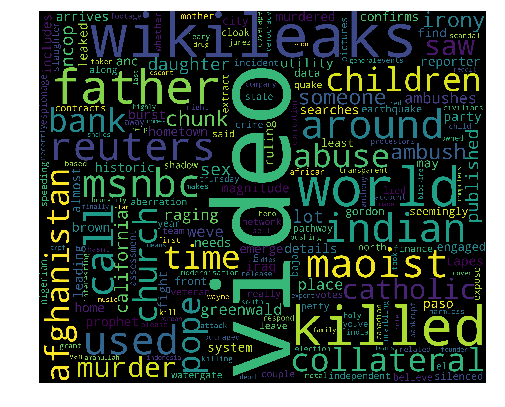

In [11]:
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [12]:
wordcloud2 = WordCloud(background_color='white',
                      width=3000,
                      height=2500
                     ).generate(non_decrease_word[0])

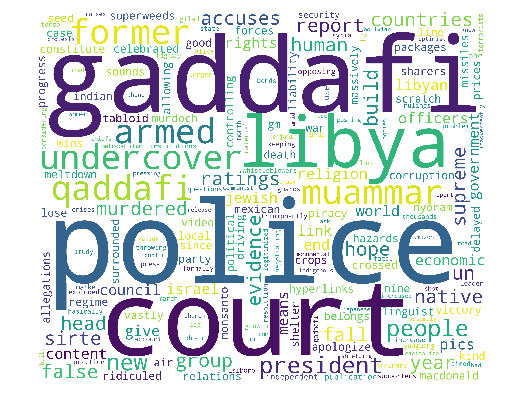

In [13]:
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

2つのクラスの特徴がそれほど異なっていないので、分類の全体的な結果があまり良くないと感じています。

# 特徴抽出

特徴抽出のためにtf-idfモデルを使用

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
train_text = []
test_text = []
for each in train['Combined']:
    train_text.append(to_words(each))

for each in test['Combined']:
    test_text.append(to_words(each))
train_features = tfidf.fit_transform(train_text)
test_features = tfidf.transform(test_text)

# モデルFit


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from ggplot import *

/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

Accuracy of LogisticRegression is 0.570351758794


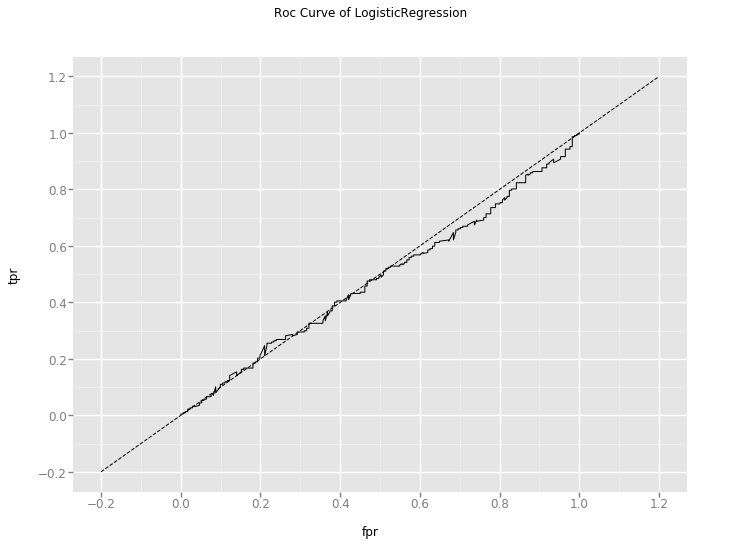

<ggplot: (283966654)>
Accuracy of KNeighborsClassifier is 0.510050251256


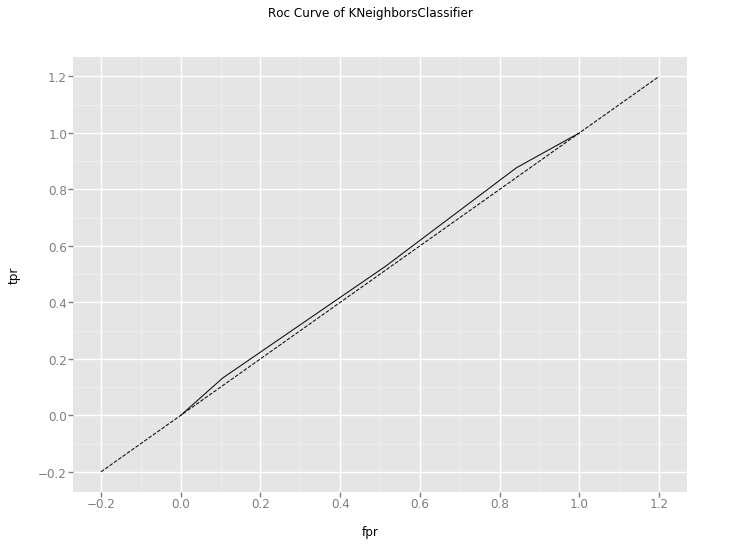

<ggplot: (-9223372036569358357)>
Accuracy of SVC is 0.570351758794


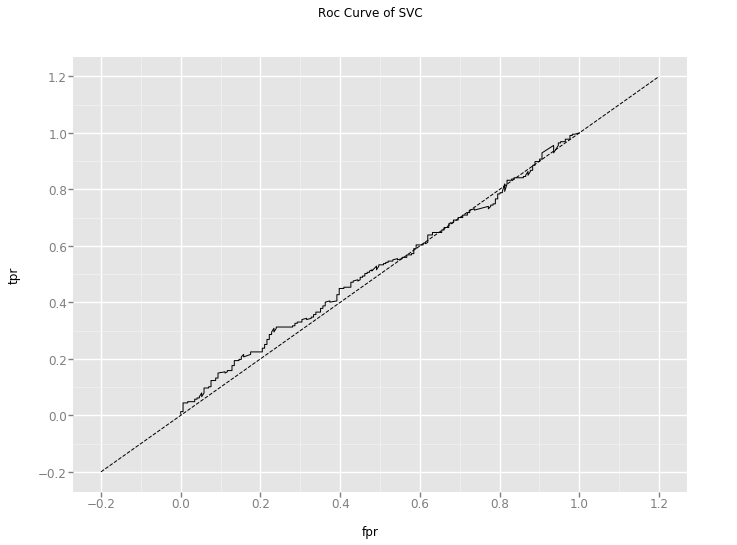

<ggplot: (-9223372036569426032)>
Accuracy of DecisionTreeClassifier is 0.482412060302


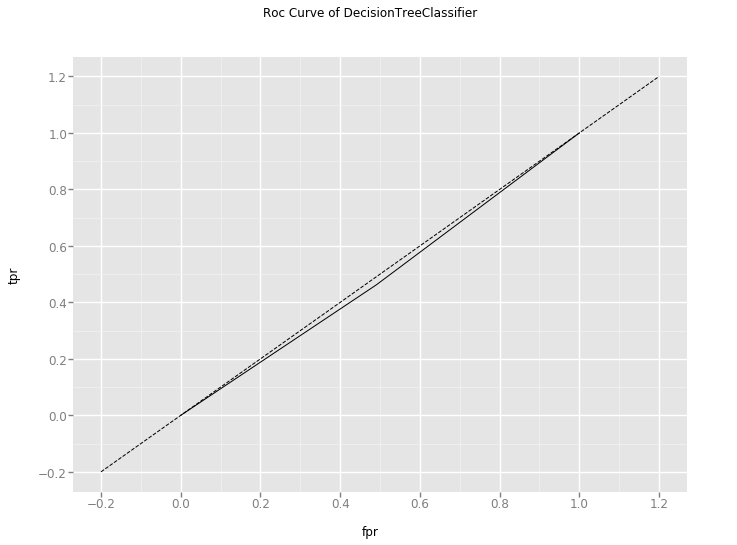

<ggplot: (-9223372036569333700)>
Accuracy of RandomForestClassifier is 0.537688442211


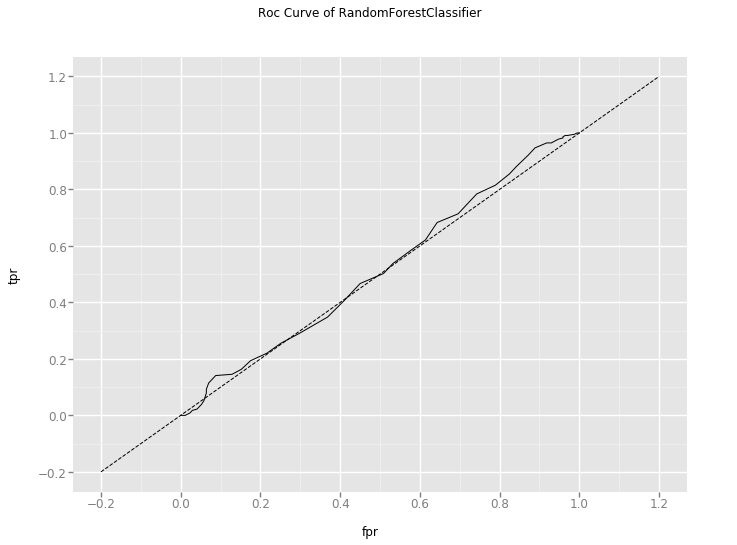

<ggplot: (-9223372036568963433)>
Accuracy of AdaBoostClassifier is 0.530150753769


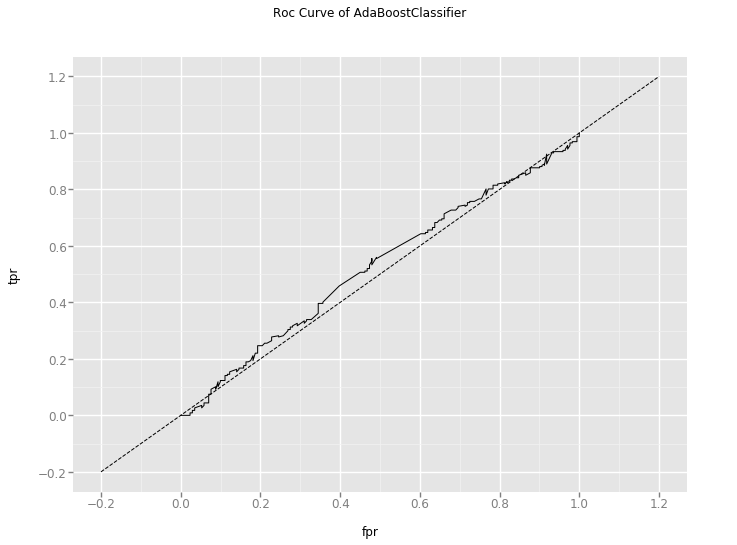

<ggplot: (-9223372036568837558)>
Accuracy of GaussianNB is 0.482412060302


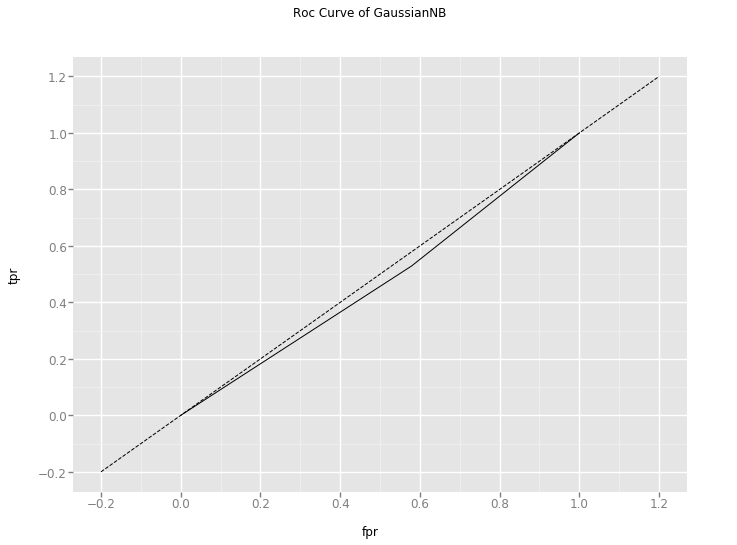

<ggplot: (-9223372036569424594)>


In [17]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['Label'])
        pred = fit.predict(test_features)
        prob = fit.predict_proba(test_features)[:,1]
    except Exception:
        fit = classifier.fit(dense_features,train['Label'])
        pred = fit.predict(dense_test)
        prob = fit.predict_proba(dense_test)[:,1]
    accuracy = accuracy_score(pred,test['Label'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    fpr, tpr, _ = roc_curve(test['Label'],prob)
    tmp = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
    g = ggplot(tmp, aes(x='fpr', y='tpr')) +geom_line() +geom_abline(linetype='dashed')+ ggtitle('Roc Curve of '+classifier.__class__.__name__)
    print(g)

# 結論

明らかに、7つのモデルの全体的なパフォーマンスはあまり良くありません。特徴は十分に明確ではないため、モデル適合性が悪くなります。